In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import seaborn as sns
from statsmodels import api as sm
import statsmodels
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
import io
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
import os
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from statsmodels.tsa.arima_model import ARMA
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
import validate

In [2]:
df = pd.read_csv( os.path.join('csv_label', 'learning_data_10.csv') )
df=df[df['day']<=0]
df

,original,label,time,day
0,53.4,0,15,0
1,52.8,0,15,0
2,52.8,0,15,0
3,53.2,0,15,0
4,53.6,0,15,0
...,...,...,...,...
431980,57.7,0,15,0
431981,58.1,0,15,0
431982,58.2,0,15,0
431983,58.8,0,15,0


In [3]:
df_test=df.loc[:36000, ['original', 'label']].copy()
df_test.reset_index(drop=True,inplace=True)
df_test

,original,label
0,53.4,0
1,52.8,0
2,52.8,0
3,53.2,0
4,53.6,0
...,...,...
35996,52.0,0
35997,51.3,0
35998,50.1,0
35999,49.9,0


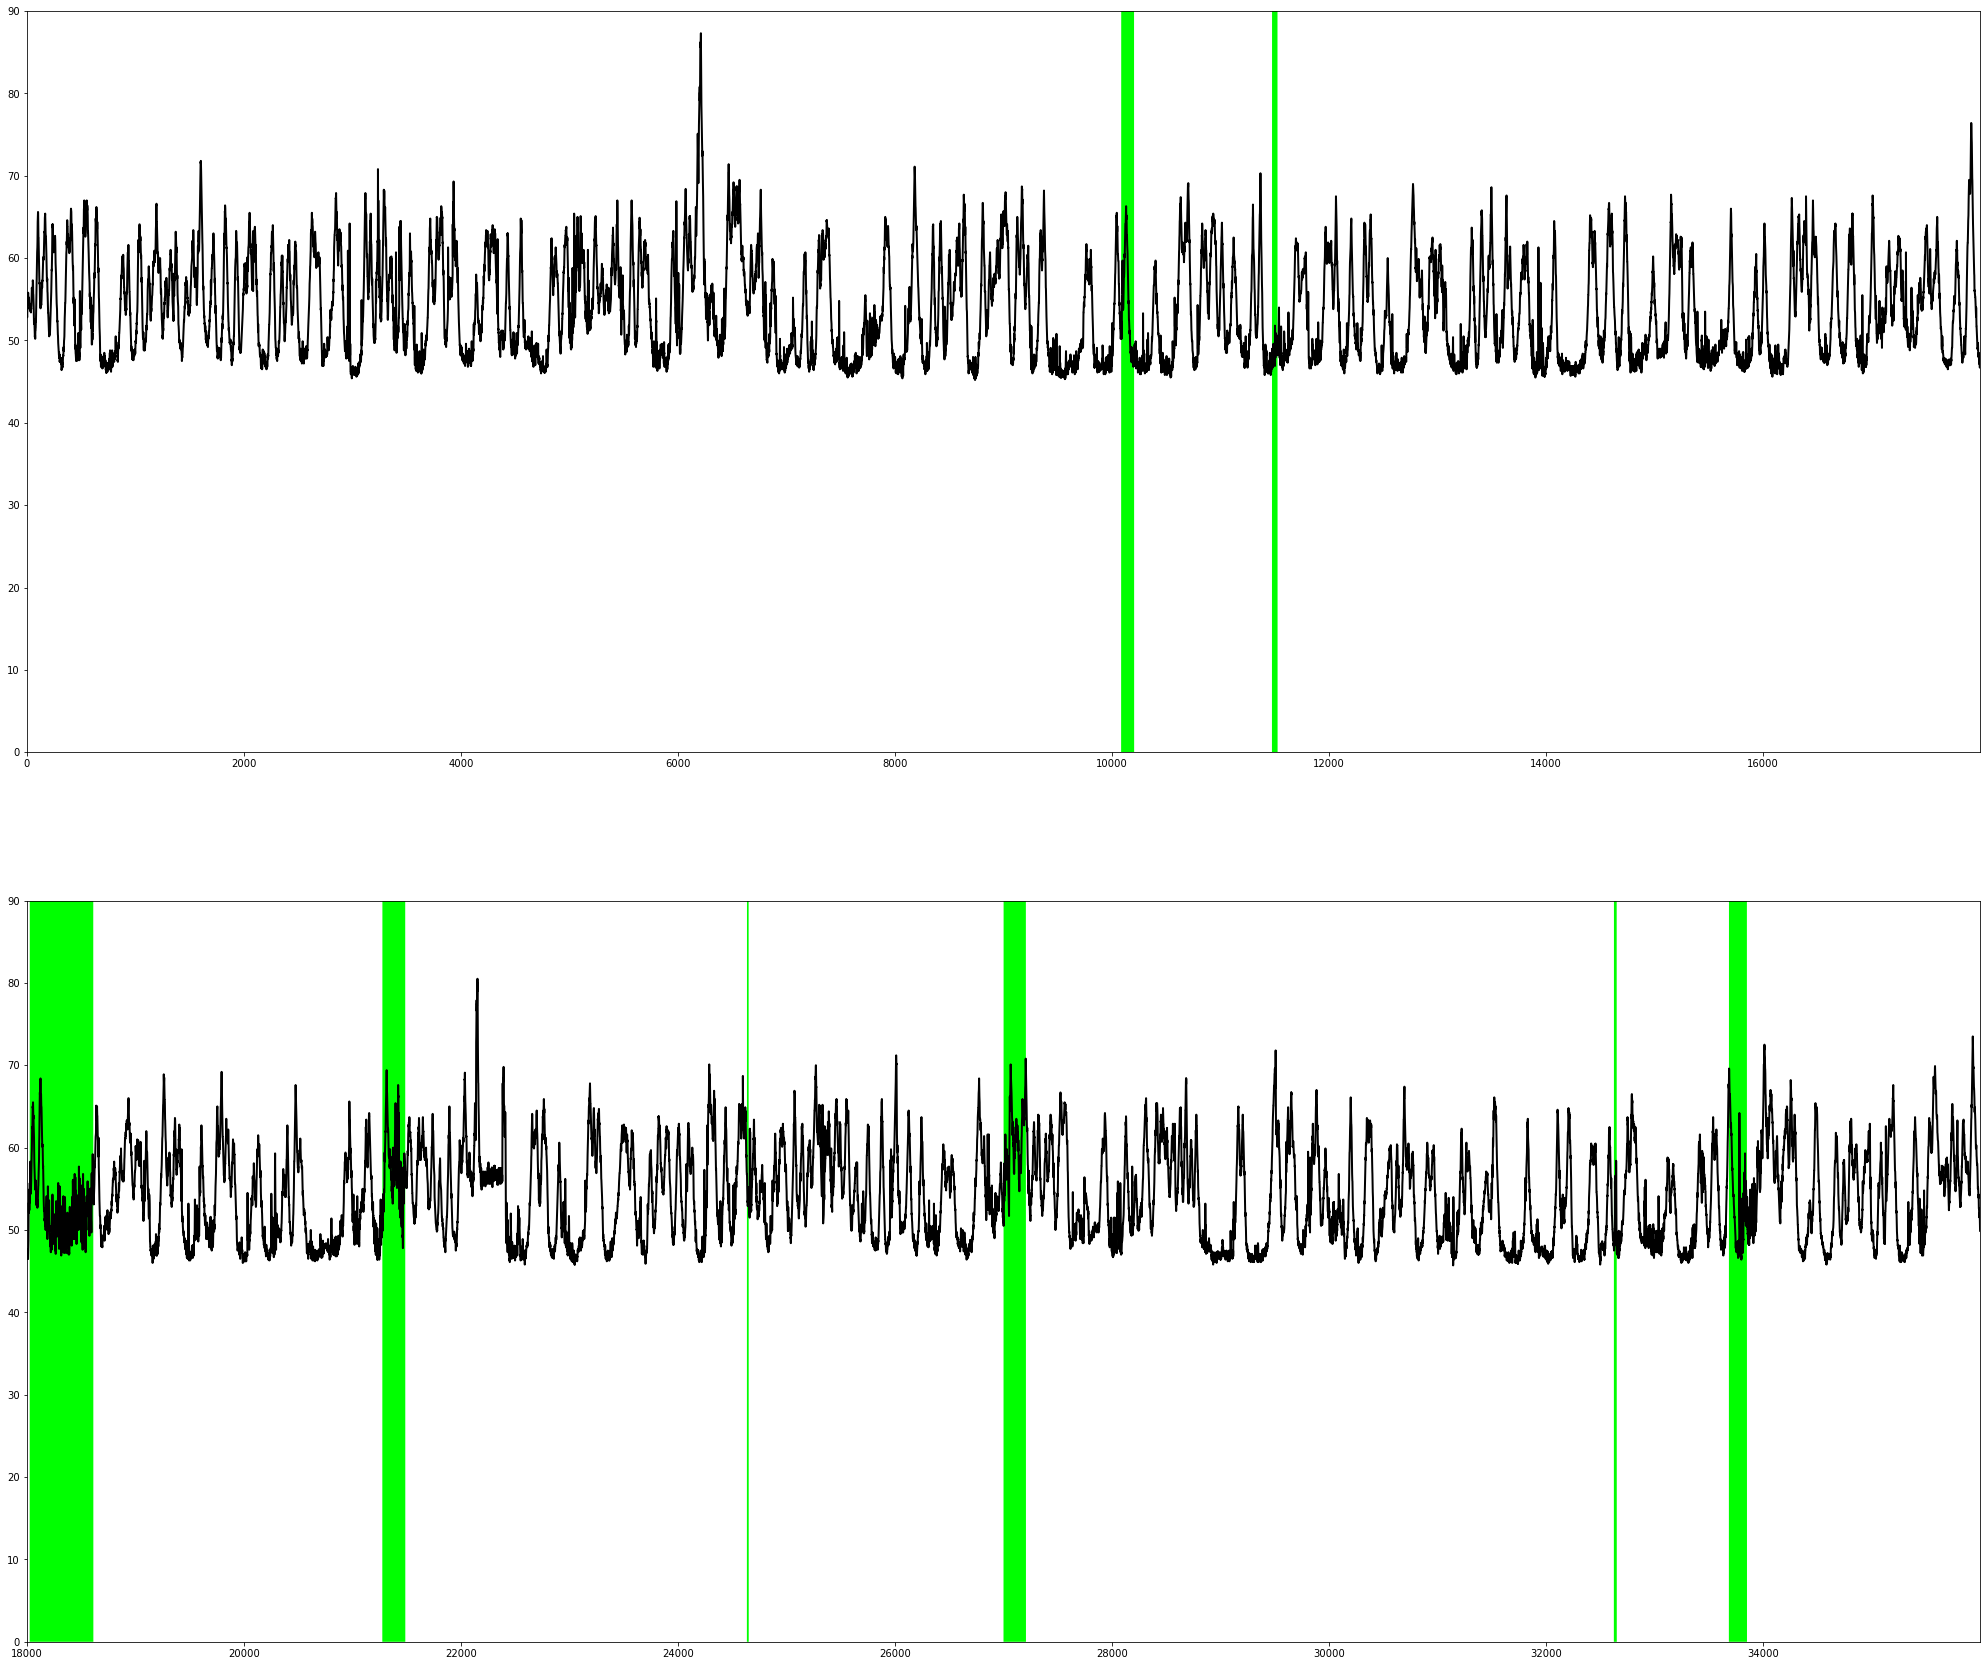

In [4]:
validate.figure(df_test)

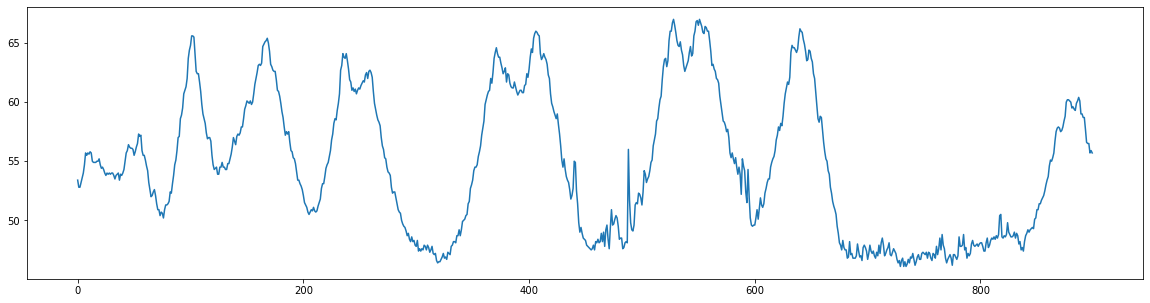

In [43]:
data=df.loc[:17999/20, 'original']
plt.rc("figure",figsize=(20,5))
fig, ax=plt.subplots(1, 1, figsize=(20, 5)) 
ax.plot(data)

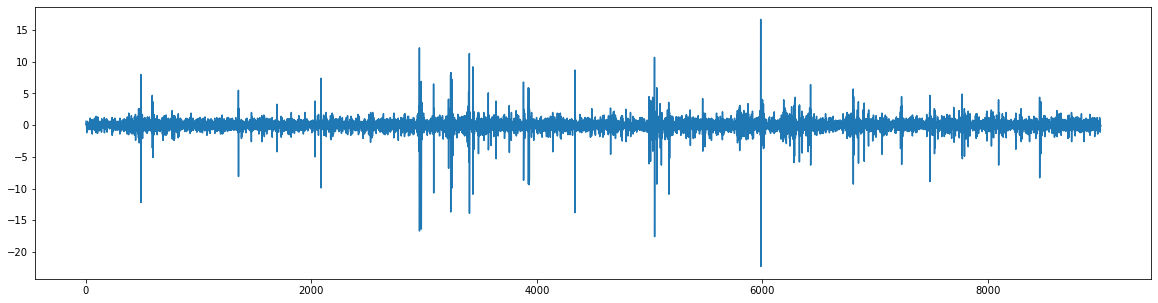

In [6]:
data_diff=data.diff()
data_2diff=data_diff.diff().dropna()
plt.plot(data_2diff)

ADF Statistic: -4.733689
p-value: 0.000073
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


/Users/arakawayuito/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


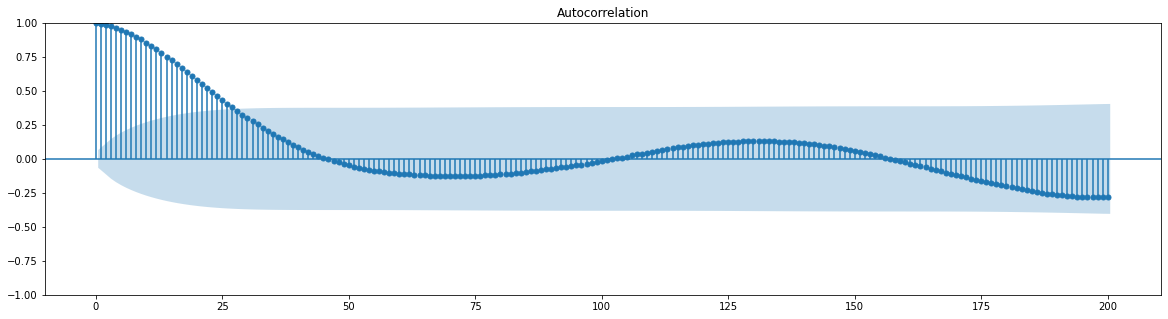

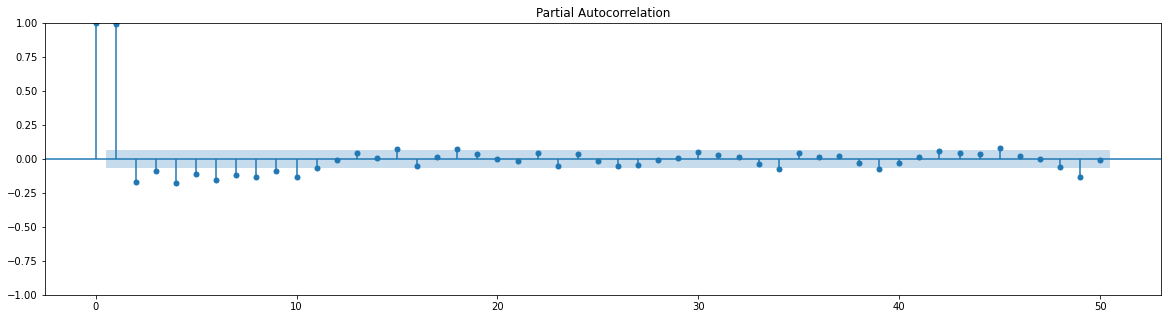

In [44]:
result = sm.tsa.stattools.adfuller(data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

sm.graphics.tsa.plot_acf(data, lags=200)
sm.graphics.tsa.plot_pacf(data, lags=50) 
plt.show()

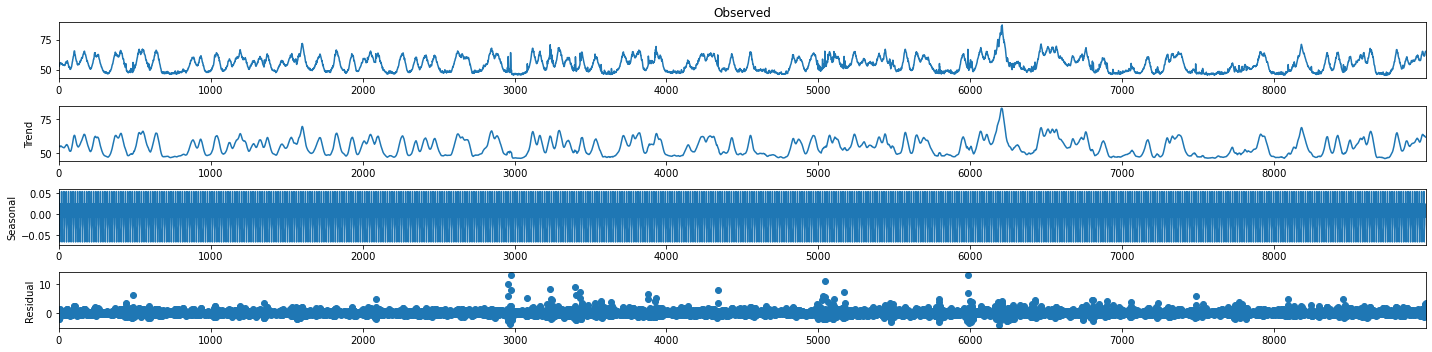

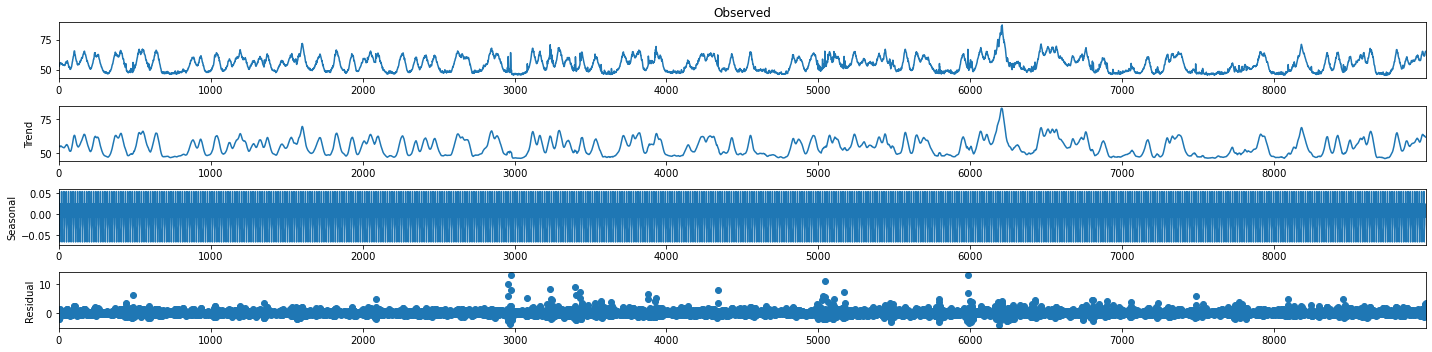

In [8]:
res = sm.tsa.seasonal_decompose(data.values, period=15, extrapolate_trend='freq')
res.plot()

/Users/arakawayuito/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


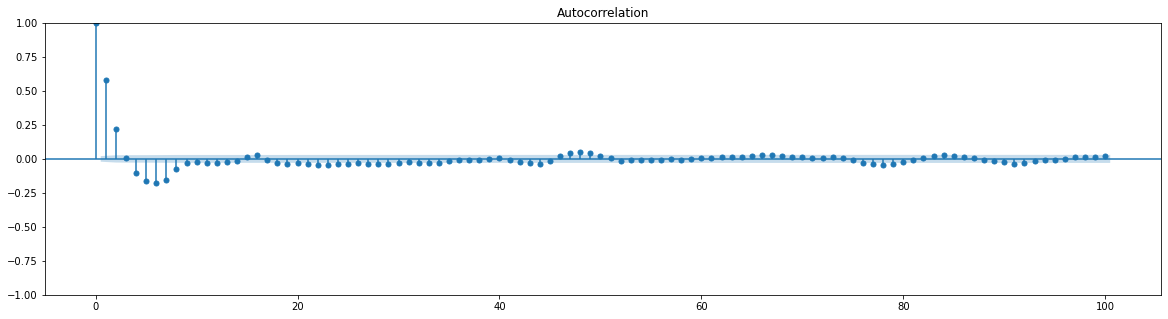

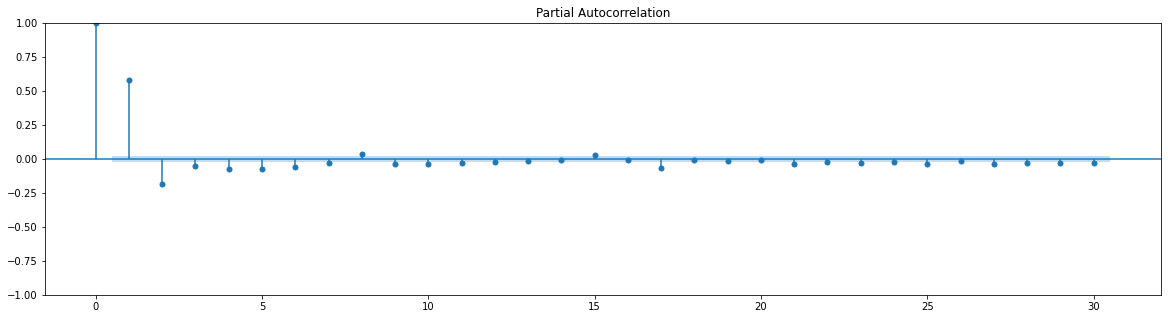

In [9]:
sm.graphics.tsa.plot_acf(res.resid,lags=100)
sm.graphics.tsa.plot_pacf(res.resid,lags=30)
plt.show()

## SARIMA

In [ ]:
p=q=range(0, 5)
d=2
sp=sd=sq=range(0, 5)
s=15
pdq=[(x[0], d, x[1]) for x in list(itertools.product(p, q))]
seasonal_pdq=[(x[0], x[1], x[2], s) for x in list(itertools.product(sp, sd, sq))]

warnings.filterwarnings('ignore')
best_result=[0, 0, 1000000]
for param in pdq:
    for s_param in seasonal_pdq:
        try:
            mod=SARIMAX(data.values, order = param, seasonal_order =s_param)
            results=mod.fit(disp=0)
            print(f'ARIMAパラメータ:{param}, 季節変動パラメータ{s_param} - AIC: {results.aic}')

            if results.aic<best_result[2]:
                  best_result=[param, s_param, results.aic]
        except:
            continue
print('AIC最小のモデル：', best_result)

ARIMAパラメータ:(0, 2, 0), 季節変動パラメータ(0, 0, 0, 15) - AIC: 371.73922215812155
ARIMAパラメータ:(0, 2, 0), 季節変動パラメータ(0, 0, 1, 15) - AIC: 372.19456611029426
ARIMAパラメータ:(0, 2, 0), 季節変動パラメータ(0, 0, 2, 15) - AIC: 373.97174050652296
ARIMAパラメータ:(0, 2, 0), 季節変動パラメータ(0, 0, 3, 15) - AIC: 375.93557528810055
ARIMAパラメータ:(0, 2, 0), 季節変動パラメータ(0, 0, 4, 15) - AIC: 376.1601864787263
ARIMAパラメータ:(0, 2, 0), 季節変動パラメータ(0, 1, 0, 15) - AIC: 379.6467604170249
ARIMAパラメータ:(0, 2, 0), 季節変動パラメータ(0, 1, 1, 15) - AIC: 353.4134208183901
ARIMAパラメータ:(0, 2, 0), 季節変動パラメータ(0, 1, 2, 15) - AIC: 355.38073254333256
ARIMAパラメータ:(0, 2, 0), 季節変動パラメータ(0, 1, 3, 15) - AIC: 356.0603848614034
ARIMAパラメータ:(0, 2, 0), 季節変動パラメータ(0, 1, 4, 15) - AIC: 356.87066105721476
ARIMAパラメータ:(0, 2, 0), 季節変動パラメータ(0, 2, 0, 15) - AIC: 417.9667451811375
ARIMAパラメータ:(0, 2, 0), 季節変動パラメータ(0, 2, 1, 15) - AIC: 370.73345158032754
ARIMAパラメータ:(0, 2, 0), 季節変動パラメータ(0, 2, 2, 15) - AIC: 358.205576473344
ARIMAパラメータ:(0, 2, 0), 季節変動パラメータ(0, 2, 3, 15) - AIC: 357.4478643000114
ARIMAパラメータ:(0,

ARIMAパラメータ:(0, 2, 0), 季節変動パラメータ(4, 3, 2, 15) - AIC: 371.0974060666301
ARIMAパラメータ:(0, 2, 0), 季節変動パラメータ(4, 3, 3, 15) - AIC: 366.1159037747712
ARIMAパラメータ:(0, 2, 0), 季節変動パラメータ(4, 3, 4, 15) - AIC: 367.6397701571469
ARIMAパラメータ:(0, 2, 0), 季節変動パラメータ(4, 4, 0, 15) - AIC: 10.0
ARIMAパラメータ:(0, 2, 0), 季節変動パラメータ(4, 4, 1, 15) - AIC: 12.0
ARIMAパラメータ:(0, 2, 0), 季節変動パラメータ(4, 4, 2, 15) - AIC: 14.0
ARIMAパラメータ:(0, 2, 0), 季節変動パラメータ(4, 4, 3, 15) - AIC: 370.8992922286364
ARIMAパラメータ:(0, 2, 0), 季節変動パラメータ(4, 4, 4, 15) - AIC: 385.1781796945048
ARIMAパラメータ:(0, 2, 1), 季節変動パラメータ(0, 0, 0, 15) - AIC: 296.1364522177488
ARIMAパラメータ:(0, 2, 1), 季節変動パラメータ(0, 0, 1, 15) - AIC: 296.92978355716923
ARIMAパラメータ:(0, 2, 1), 季節変動パラメータ(0, 0, 2, 15) - AIC: 298.79278377084097
ARIMAパラメータ:(0, 2, 1), 季節変動パラメータ(0, 0, 3, 15) - AIC: 300.7415796116255
ARIMAパラメータ:(0, 2, 1), 季節変動パラメータ(0, 0, 4, 15) - AIC: 301.9344977237138
ARIMAパラメータ:(0, 2, 1), 季節変動パラメータ(0, 1, 0, 15) - AIC: 320.9749252362306
ARIMAパラメータ:(0, 2, 1), 季節変動パラメータ(0, 1, 1, 15) - AIC: 291.5

ARIMAパラメータ:(0, 2, 1), 季節変動パラメータ(4, 2, 0, 15) - AIC: 314.31961786560913
ARIMAパラメータ:(0, 2, 1), 季節変動パラメータ(4, 2, 1, 15) - AIC: 315.1634527173827
ARIMAパラメータ:(0, 2, 1), 季節変動パラメータ(4, 2, 2, 15) - AIC: 315.7857305250635
ARIMAパラメータ:(0, 2, 1), 季節変動パラメータ(4, 2, 3, 15) - AIC: 317.2335761639618
ARIMAパラメータ:(0, 2, 1), 季節変動パラメータ(4, 2, 4, 15) - AIC: 319.27922368547627
ARIMAパラメータ:(0, 2, 1), 季節変動パラメータ(4, 3, 0, 15) - AIC: 331.15012715341294
ARIMAパラメータ:(0, 2, 1), 季節変動パラメータ(4, 3, 1, 15) - AIC: 330.7882536423811
ARIMAパラメータ:(0, 2, 1), 季節変動パラメータ(4, 3, 3, 15) - AIC: 335.85191099004237
ARIMAパラメータ:(0, 2, 1), 季節変動パラメータ(4, 3, 4, 15) - AIC: 336.13046176521226
ARIMAパラメータ:(0, 2, 1), 季節変動パラメータ(4, 4, 0, 15) - AIC: 338.8369800325721
ARIMAパラメータ:(0, 2, 1), 季節変動パラメータ(4, 4, 1, 15) - AIC: 340.8369804253611
ARIMAパラメータ:(0, 2, 1), 季節変動パラメータ(4, 4, 2, 15) - AIC: 342.83696298840584
ARIMAパラメータ:(0, 2, 1), 季節変動パラメータ(4, 4, 3, 15) - AIC: 344.8369131387102
ARIMAパラメータ:(0, 2, 2), 季節変動パラメータ(0, 0, 0, 15) - AIC: 297.0672589392701
ARIMAパラメータ:(0,

## ARIMA

In [ ]:
p=[0]
q=range(0, 70)
d=0
pdq=[(x[0], d, x[1]) for x in list(itertools.product(p, q))]
warnings.filterwarnings('ignore')
best_result=[0, 0, 1000000]
for param in pdq:
    try:
        mod=SARIMAX(data.values, order = param, seasonal_order =(0, 0, 0, 0))
        results=mod.fit(disp=0)
        print(f'ARIMAパラメータ:{param}, 季節変動パラメータ(0, 0, 0, 0) - AIC: {results.aic}')

        if results.aic<best_result[2]:
              best_result=[param, (0, 0, 0, 0), results.aic]
    except:
        continue
print('AIC最小のモデル：', best_result)

ARIMAパラメータ:(0, 0, 0), 季節変動パラメータ(0, 0, 0, 0) - AIC: 97642.89208136559
ARIMAパラメータ:(0, 0, 1), 季節変動パラメータ(0, 0, 0, 0) - AIC: 85337.55281920741
ARIMAパラメータ:(0, 0, 2), 季節変動パラメータ(0, 0, 0, 0) - AIC: 74306.3372917842
ARIMAパラメータ:(0, 0, 3), 季節変動パラメータ(0, 0, 0, 0) - AIC: 65173.990440662965
ARIMAパラメータ:(0, 0, 4), 季節変動パラメータ(0, 0, 0, 0) - AIC: 58081.25136096125
ARIMAパラメータ:(0, 0, 5), 季節変動パラメータ(0, 0, 0, 0) - AIC: 52603.389281976044
ARIMAパラメータ:(0, 0, 6), 季節変動パラメータ(0, 0, 0, 0) - AIC: 48482.48106874942
ARIMAパラメータ:(0, 0, 7), 季節変動パラメータ(0, 0, 0, 0) - AIC: 45084.505176732404
ARIMAパラメータ:(0, 0, 8), 季節変動パラメータ(0, 0, 0, 0) - AIC: 52276.1277728209
ARIMAパラメータ:(0, 0, 9), 季節変動パラメータ(0, 0, 0, 0) - AIC: 46913.21026983807
ARIMAパラメータ:(0, 0, 10), 季節変動パラメータ(0, 0, 0, 0) - AIC: 46688.334838851326
ARIMAパラメータ:(0, 0, 11), 季節変動パラメータ(0, 0, 0, 0) - AIC: 42968.634889469315
ARIMAパラメータ:(0, 0, 12), 季節変動パラメータ(0, 0, 0, 0) - AIC: 49717.35839290153
ARIMAパラメータ:(0, 0, 13), 季節変動パラメータ(0, 0, 0, 0) - AIC: 39671.288162450684
ARIMAパラメータ:(0, 0, 14), 季節変

In [56]:
sarima_model = sm.tsa.SARIMAX(data.values, order=(100,0,0), seasonal_order=(0,0,0,0))
result = sarima_model.fit(disp=0)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  900
Model:             SARIMAX(100, 0, 0)   Log Likelihood                -835.747
Date:                Thu, 15 Sep 2022   AIC                           1873.493
Time:                        17:06:52   BIC                           2358.535
Sample:                             0   HQIC                          2058.783
                                - 900                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0154      0.028     36.544      0.000       0.961       1.070
ar.L2         -0.0347      0.038     -0.904      0.366      -0.110       0.041
ar.L3          0.1151      0.040      2.846      0.004       0.036       0.194
ar.L4         -0.0240      0.052     -0.460      0.645      -0.126       0.078
ar.L5          0.0154      0.061      0.251      0.802      -0.105       0.136
ar.L6         -0.0082      0.045     -0.183      0.855      -0.096       0.079
ar.L7          0.0167      0.053      0.316      0.752      -0.087       0.120
ar.L8         -0.0100      0.064     -0.157      0.876      -0.135       0.115
ar.L9          0.0242      0.070      0.345      0.730      -0.113       0.162
ar.L10        -0.0657      0.074     -0.890      0.374      -0.211       0.079
ar.L11        -0.0556      0.074     -0.750      0.453      -0.201       0.090
ar.L12        -0.0350      0.065     -0.540      0.589      -0.162       0.092
ar.L13         0.0348      0.055      0.629      0.529      -0.074       0.143
ar.L14        -0.0320      0.044     -0.723      0.469      -0.119       0.055
ar.L15         0.0751      0.048      1.566      0.117      -0.019       0.169
ar.L16        -0.0544      0.050     -1.082      0.279      -0.153       0.044
ar.L17        -0.0535      0.057     -0.946      0.344      -0.164       0.057
ar.L18         0.0492      0.072      0.684      0.494      -0.092       0.190
ar.L19         0.0338      0.076      0.443      0.658      -0.116       0.184
ar.L20         0.0065      0.070      0.093      0.926      -0.131       0.144
ar.L21        -0.0677      0.071     -0.955      0.340      -0.207       0.071
ar.L22         0.0473      0.068      0.699      0.485      -0.085       0.180
ar.L23        -0.0648      0.070     -0.929      0.353      -0.201       0.072
ar.L24         0.0695      0.064      1.077      0.281      -0.057       0.196
ar.L25         0.0393      0.059      0.667      0.505      -0.076       0.155
ar.L26        -0.0006      0.069     -0.009      0.993      -0.135       0.134
ar.L27        -0.0505      0.058     -0.866      0.387      -0.165       0.064
ar.L28        -0.0170      0.057     -0.298      0.766      -0.129       0.095
ar.L29        -0.0233      0.058     -0.400      0.689      -0.137       0.091
ar.L30         0.0165      0.047      0.349      0.727      -0.076       0.109
ar.L31         0.0341      0.049      0.693      0.488      -0.062       0.131
ar.L32         0.0021      0.056      0.037      0.971      -0.108       0.112
ar.L33         0.0389      0.049      0.792      0.428      -0.057       0.135
ar.L34        -0.0685      0.052     -1.320      0.187      -0.170       0.033
ar.L35         0.0259      0.069      0.374      0.709      -0.110       0.162
ar.L36         0.0038      0.053      0.071      0.943      -0.099       0.107
ar.L37         0.0150      0.059      0.256      0.798      -0.100       0.130
ar.L38         0.0379      0.053      0.715      0.475      -0.066       0.142
ar

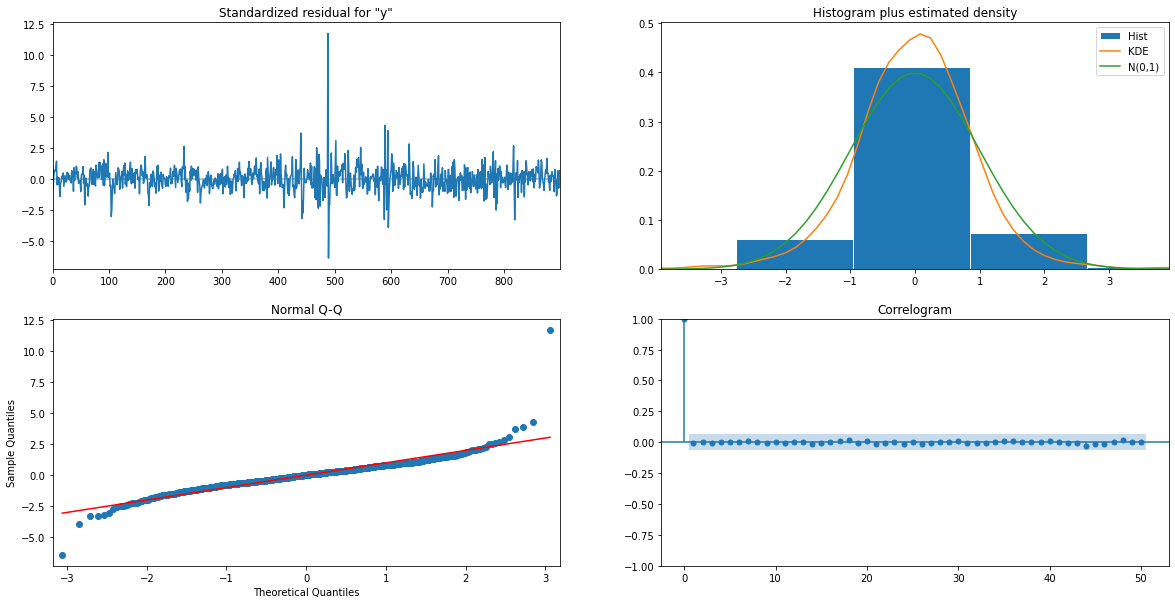

In [57]:
plt.rc("figure",figsize=(20,10))
resid_plot=result.plot_diagnostics(lags=50)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 70.0)

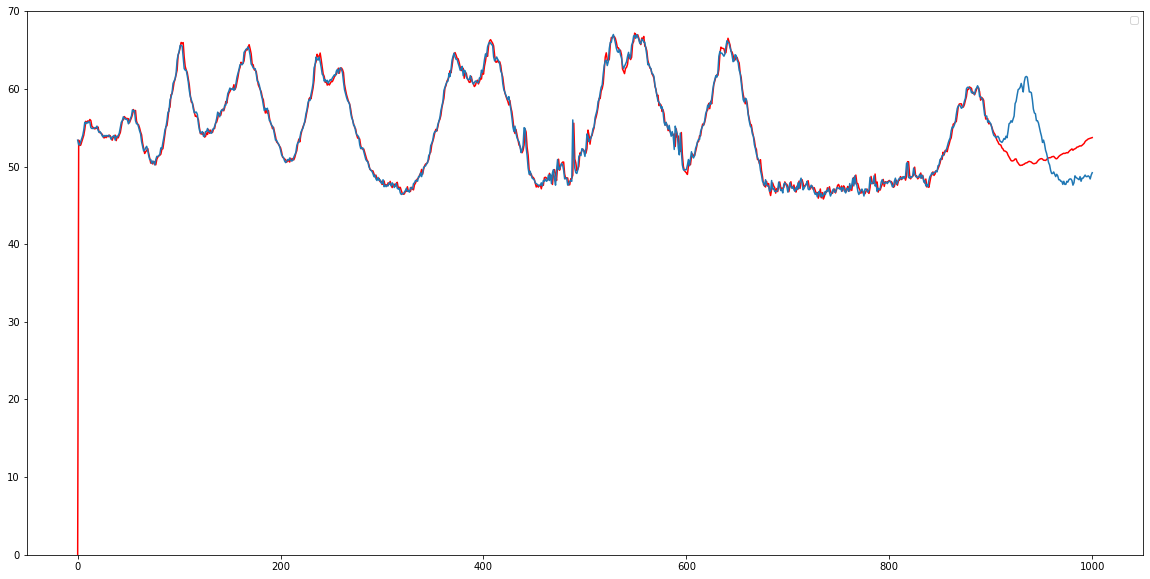

In [58]:
start=0
end=1000
bestPred=result.predict(start=start, end=end)
plt.plot(np.arange(start, end+1), bestPred, "r")
plt.plot(np.arange(start, end+1), df.loc[start:end, 'original'].values)
plt.legend()
plt.ylim(0, 70)